# Hierarchical Clustering - Ejemplo - Happiness

**Contexto**  
Este conjunto de datos contiene los resultados de una encuesta, para determinar las características que tienen mas influencia en la felicidad de las personas.  

**Contenido**  
El conjunto de datos proviene de UCI: [Somerville Happiness Survey](https://archive.ics.uci.edu/dataset/479/somerville+happiness+survey).  
Contiene 143 renglones con las siguientes columnas:  

| Variable                     | Definición              | Valor    |
| --------- | ----------------------- | -------- |
| D         | Si la persona es feliz o no **(variable objetivo)**               | 0 = no, 1= si |
| X1        | La disponibilidad de información sobre los servicios de la ciudad | 1 a 5         |
| X2        | El costo de vivienda                                              | 1 a 5         |
| X3        | La calidad general de las escuelas públicas                       | 1 a 5         |
| X4        | La confianza en la policía local                                  | 1 a 5         |
| X5        | El mantenimiento de las calles y banquetas                        | 1 a 5         |
| X6        | La disponibilidad de eventos sociales comunitarios                | 1 a 5         |

**Planteamiento del problema**  
Se busca predecir si la persona es feliz o no, de acuerdo a la calidad de los diferentes servicios.

**Nota:** este conjunto de datos es para problemas de clasificación, dado que contamos con las etiquetas.  
Lo usaremos para clustering, solo para efectos ilustrativos, comparando loas resultados del modelo contra las etiquetas

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('SomervilleHappinessSurvey2015.csv')
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
# Renombrar y ordenar columnas
df.columns = ['feliz', 'servicios', 'costo', 'escuela', 'policia', 'mantenimiento', 'evento']
df = df[['servicios', 'costo', 'escuela', 'policia', 'mantenimiento', 'evento', 'feliz']]

## Modelado

In [4]:
# Variables independientes
X = df[['servicios', 'costo', 'escuela', 'policia', 'mantenimiento', 'evento']]
X.head()

,servicios,costo,escuela,policia,mantenimiento,evento
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [5]:
# Variable dependiente
y = df['feliz']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: feliz, dtype: int64

In [6]:
print('X:', len(X), 'y:', len(y))

X: 143 y: 143


In [7]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)

AgglomerativeClustering(n_clusters=3)

In [8]:
# Resultados
model.labels_

array([0, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

## Visualizacion

In [9]:
Z = linkage(df, "ward")

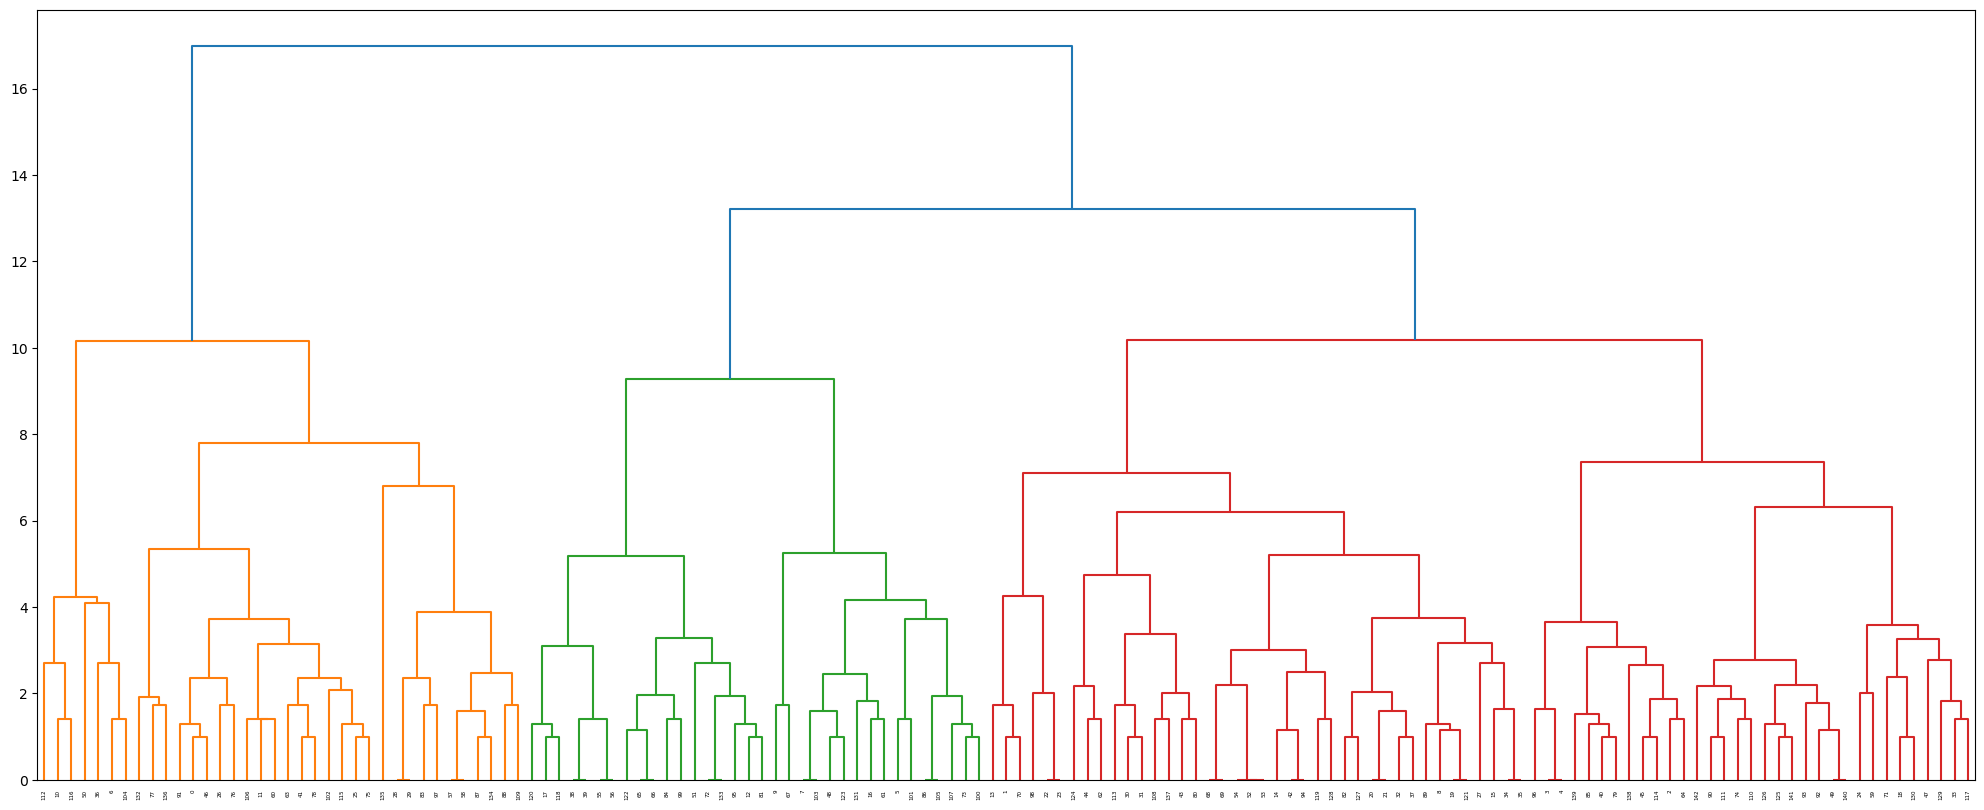

In [10]:
plt.figure(figsize=(25,10))
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()